# Churn Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis = 1, inplace = True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.describe(include='object').T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [12]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, 'Churn Analysis')

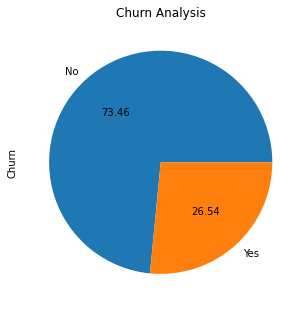

In [14]:
plt.figure(figsize=(5,8))
df['Churn'].value_counts().plot(kind ='pie',autopct = '%.2f')
plt.title("Churn Analysis")

26.5% of customers switched to another company.

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender and Churn Distribuions')

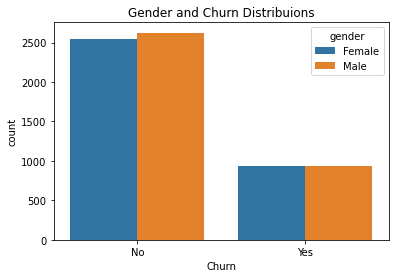

In [15]:
sns.countplot("Churn", data=df,hue="gender")
plt.title("Gender and Churn Distribuions")


There is negligible difference in customer percentage who changed the service provider. Both genders behaved in similar way when it comes to migrating to another service provider

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customer Contract Distribution w.r.t Churn')

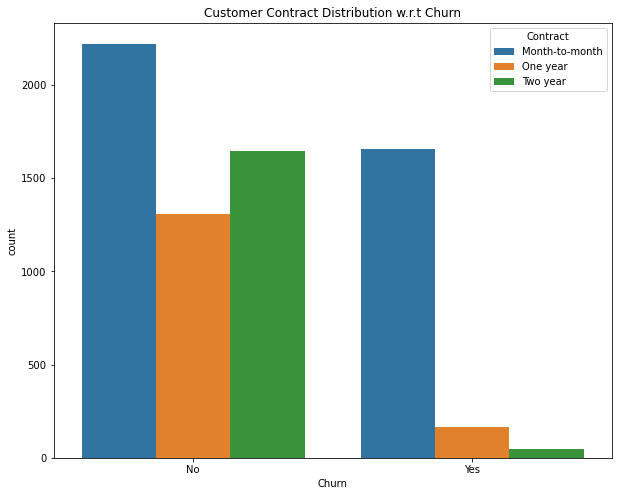

In [16]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue="Contract")
plt.title("Customer Contract Distribution w.r.t Churn")

Text(0.5, 1.0, '% of Payment Method')

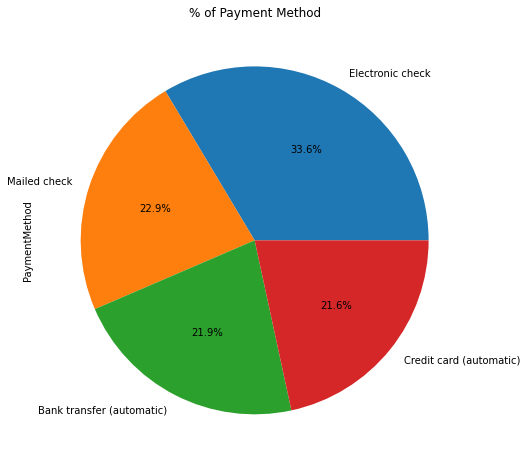

In [17]:
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Payment Method")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

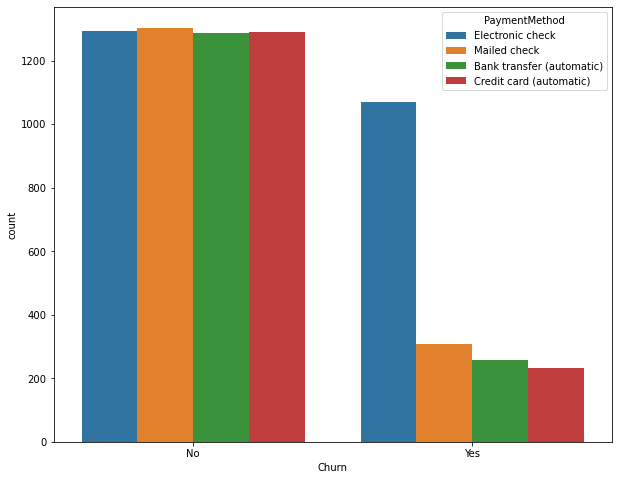

In [18]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue="PaymentMethod")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn Distribution w.r.t Internet Service')

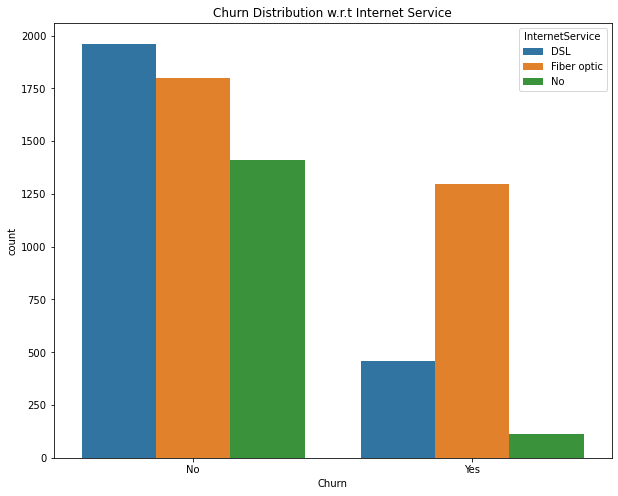

In [19]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("InternetService"))
plt.title("Churn Distribution w.r.t Internet Service")


Text(0.5, 1.0, '% of Dependents')

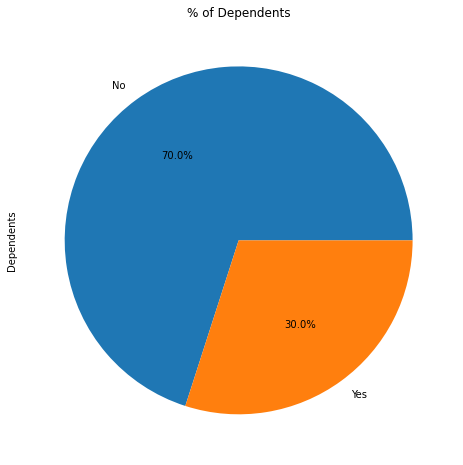

In [20]:
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Dependents")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'churn Distribution w.r.t to Dependents')

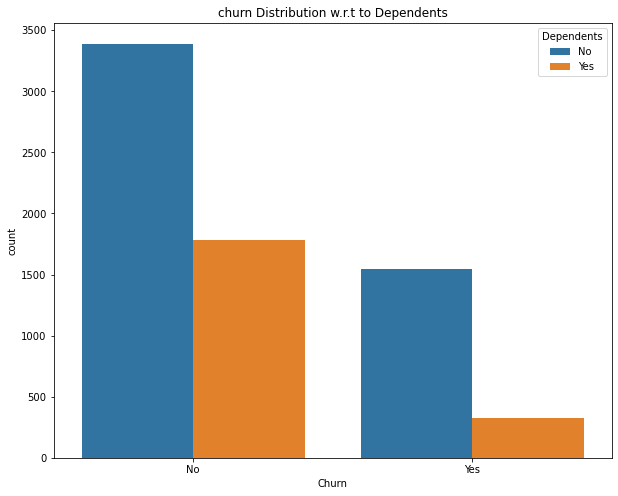

In [21]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("Dependents"))
plt.title("churn Distribution w.r.t to Dependents")

Text(0.5, 1.0, '% of Partner')

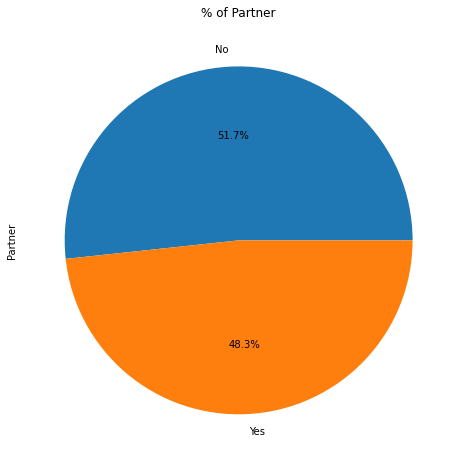

In [22]:
df['Partner'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Partner")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'churn vs partner')

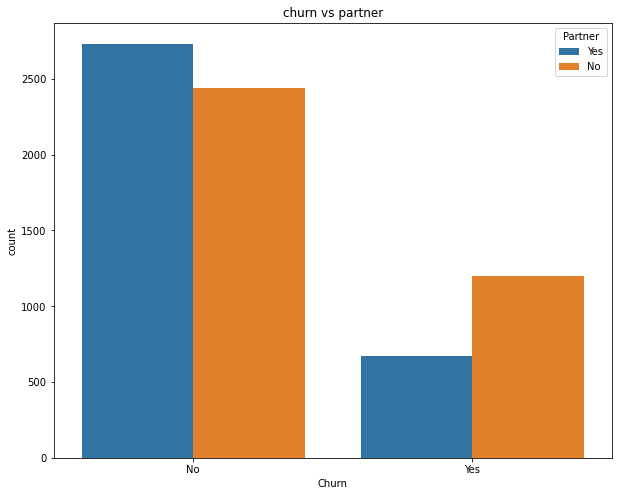

In [23]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("Partner"))
plt.title("churn vs partner")

Text(0.5, 1.0, '% of Senior Citizen')

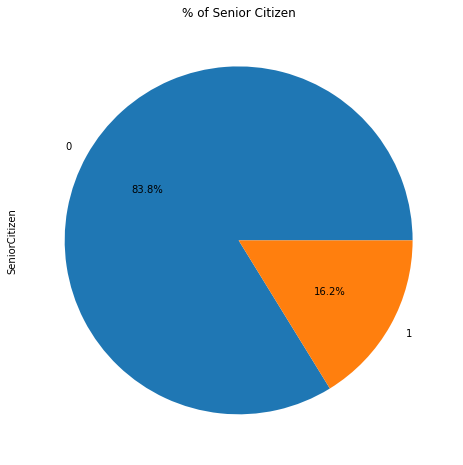

In [24]:
df['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Senior Citizen")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn vs Seniorcitizen')

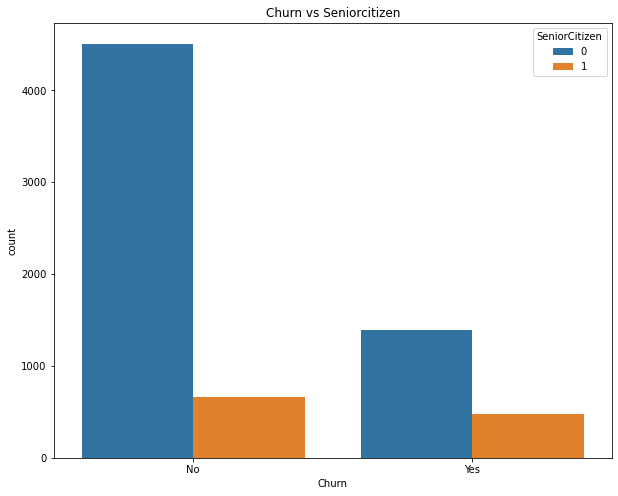

In [25]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("SeniorCitizen"))
plt.title("Churn vs Seniorcitizen")

Text(0.5, 1.0, '% of TechSupport')

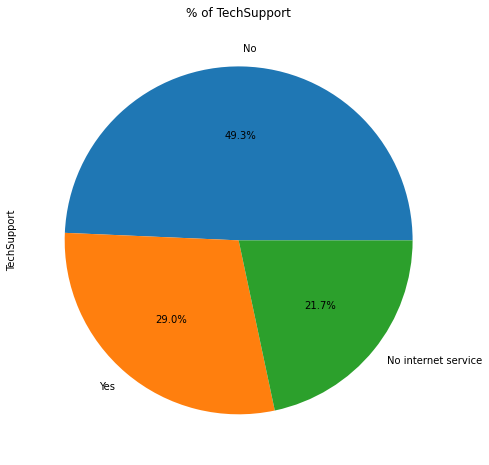

In [26]:
df['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of TechSupport")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn vs TechSupport')

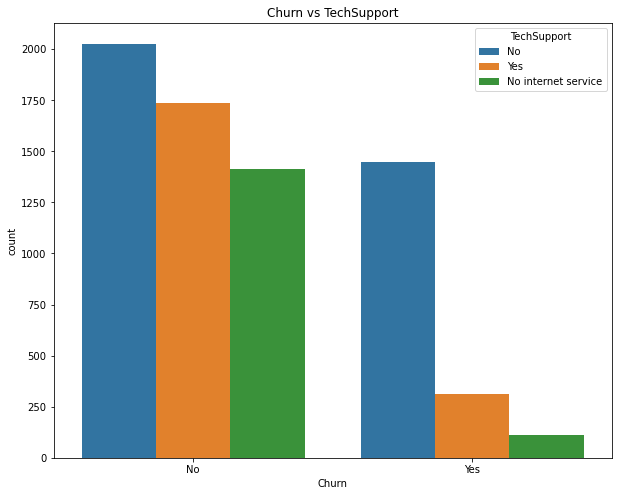

In [27]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("TechSupport"))
plt.title("Churn vs TechSupport")

Text(0.5, 1.0, '% of PhoneService ')

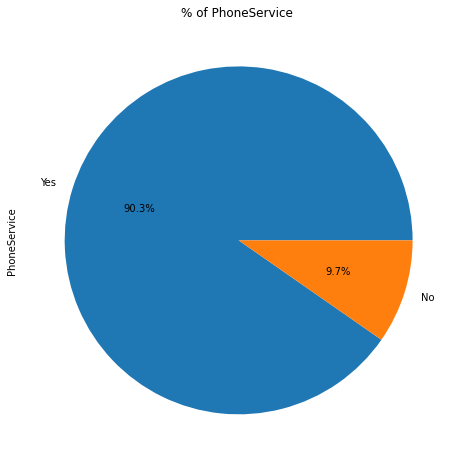

In [28]:
df['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of PhoneService ")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn vs TechSupport')

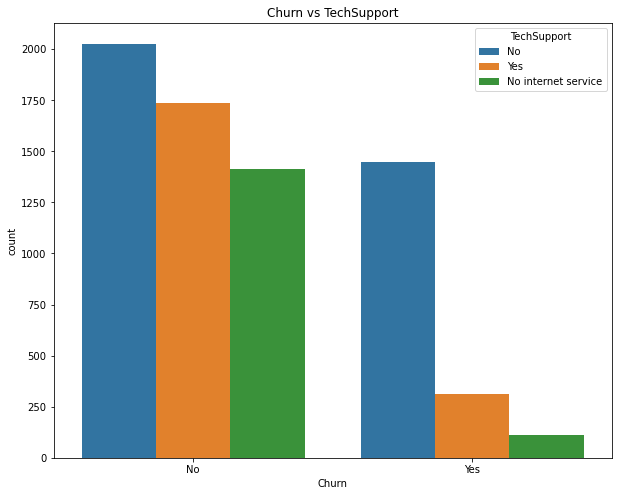

In [29]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("TechSupport"))
plt.title("Churn vs TechSupport")

Text(0.5, 1.0, '% of MultipleLines')

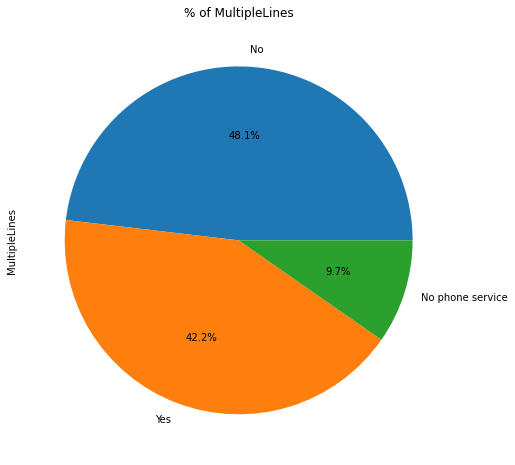

In [30]:
df['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of MultipleLines")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn vs MultipleLines')

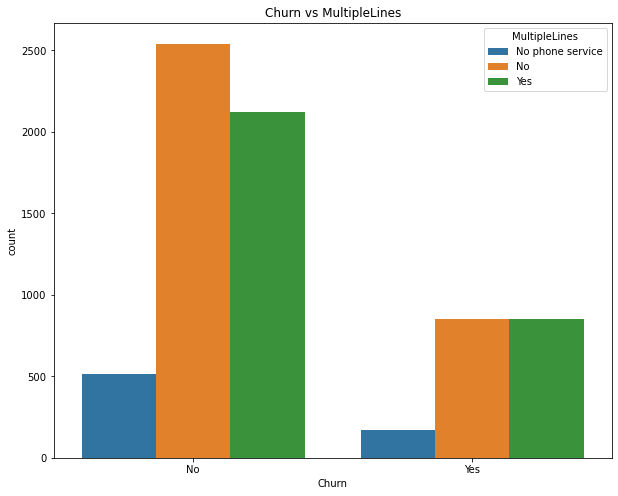

In [31]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("MultipleLines"))
plt.title("Churn vs MultipleLines")

Text(0.5, 1.0, '% of OnlineSecurity')

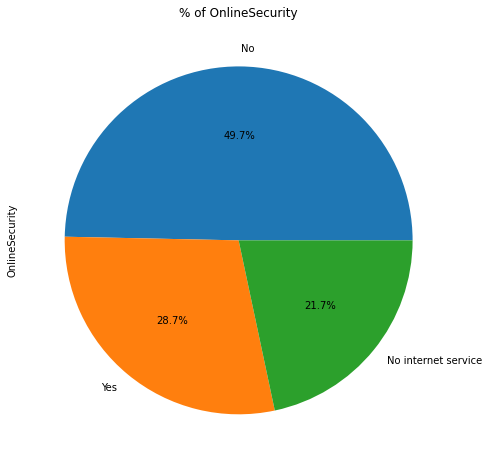

In [32]:
df['OnlineSecurity'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of OnlineSecurity")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn vs OnlineSecurity')

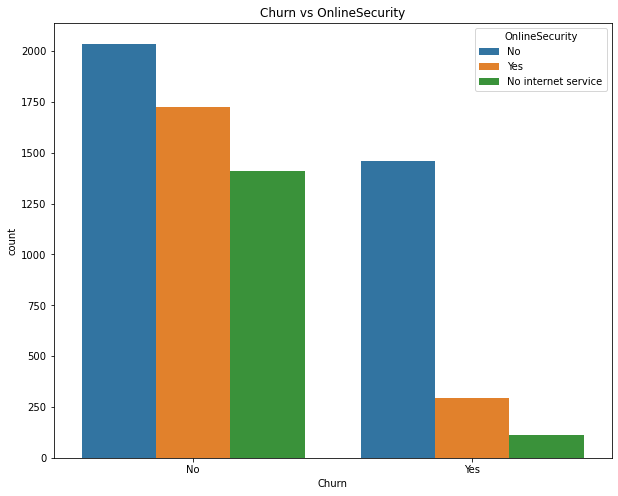

In [33]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("OnlineSecurity"))
plt.title("Churn vs OnlineSecurity")

Text(0.5, 1.0, '% of OnlineBackup')

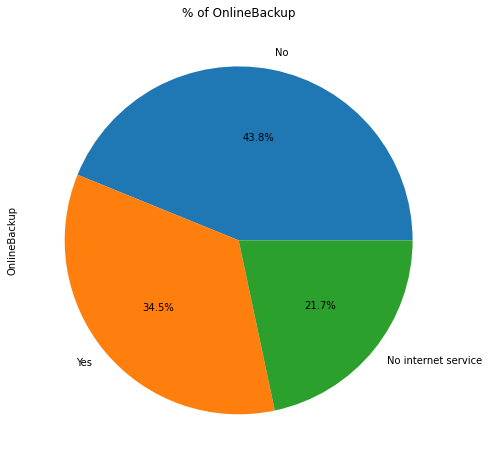

In [34]:
df['OnlineBackup'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of OnlineBackup")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn vs OnlineBackup')

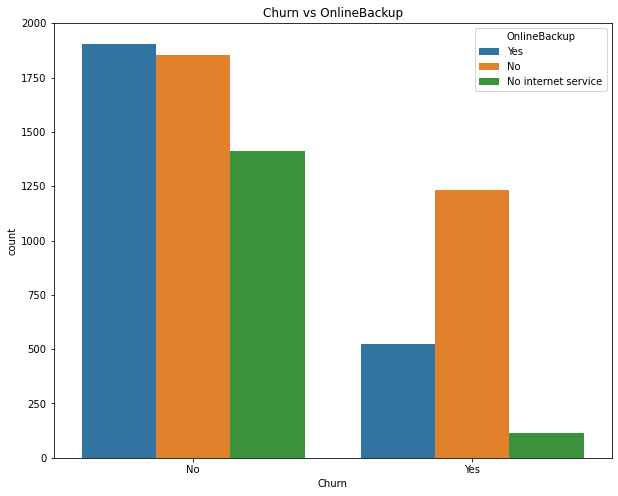

In [35]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("OnlineBackup"))
plt.title("Churn vs OnlineBackup")

Text(0.5, 1.0, '% of DeviceProtection')

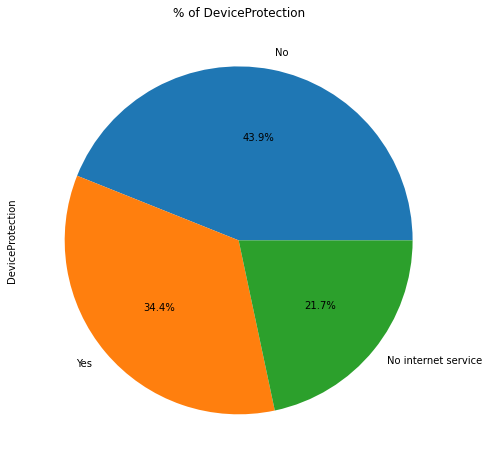

In [36]:
df['DeviceProtection'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of DeviceProtection")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn vs DeviceProtection')

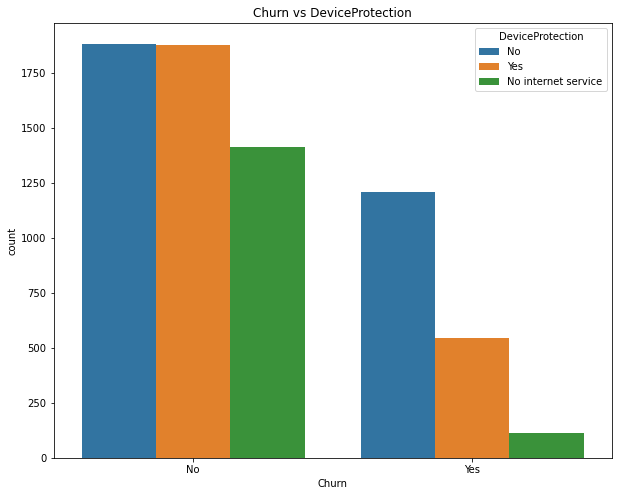

In [37]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("DeviceProtection"))
plt.title("Churn vs DeviceProtection")

Text(0.5, 1.0, '% of PaperlessBilling')

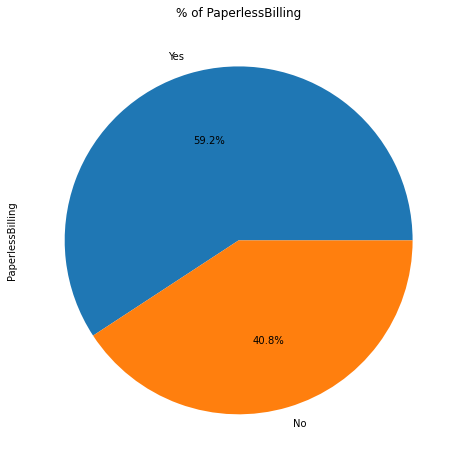

In [38]:
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of PaperlessBilling")

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn vs PaperlessBilling')

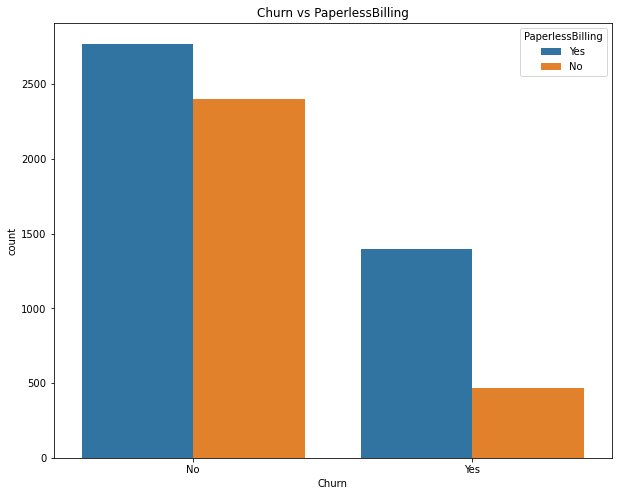

In [39]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=df,hue=("PaperlessBilling"))
plt.title("Churn vs PaperlessBilling")

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

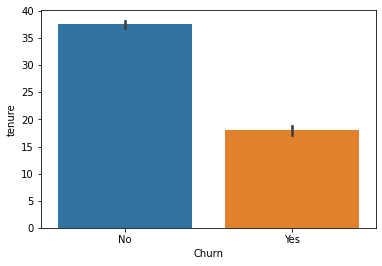

In [40]:
sns.barplot(x='Churn',y='tenure',data=df)

Text(0.5, 1.0, 'Churn Vs MonthlyCharges')

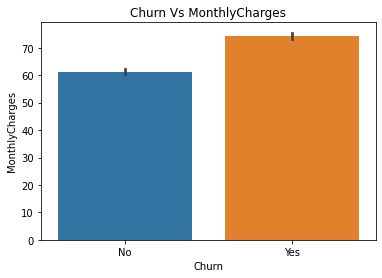

In [46]:
sns.barplot(x='Churn',y='MonthlyCharges',data=df)
plt.title("Churn Vs MonthlyCharges")

Text(0.5, 1.0, 'Churn Vs TotalCharges')

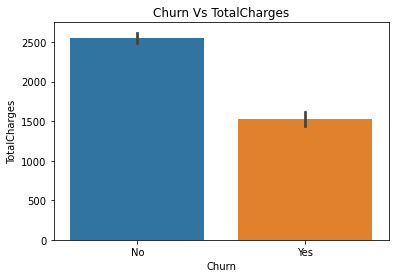

In [47]:
sns.barplot(x='Churn',y='TotalCharges',data=df)
plt.title("Churn Vs TotalCharges")

In [52]:
cat = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
      'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
       'PaymentMethod','Churn']

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [55]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

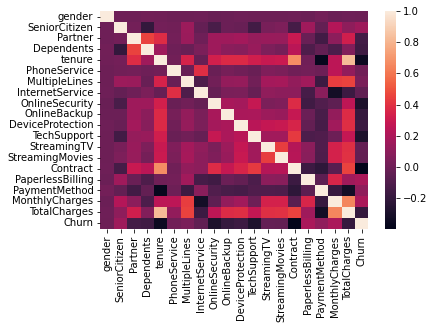

In [56]:
sns.heatmap(df.corr())

In [57]:
df1=df.copy()

In [71]:
X=df1.drop(["Churn"],axis=1)
y=df1["Churn"]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1234)

In [74]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-1.01142428, -0.43814715, -0.98350319, ..., -1.4803675 ,
         0.32419196,  0.35505434],
       [ 0.98870476, -0.43814715,  1.01677352, ...,  1.32663702,
         0.05990168, -0.53656817],
       [-1.01142428, -0.43814715,  1.01677352, ..., -0.54469932,
        -1.34299766, -0.3502157 ],
       ...,
       [ 0.98870476, -0.43814715, -0.98350319, ..., -1.4803675 ,
         0.99904639, -0.06465384],
       [ 0.98870476, -0.43814715, -0.98350319, ...,  1.32663702,
        -0.69473849, -0.72152582],
       [ 0.98870476, -0.43814715, -0.98350319, ..., -1.4803675 ,
         0.70151205, -0.33491695]])

In [76]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_predict=log.predict(X_test)
y_predict

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 1])

In [77]:
accuracy_score(y_test,y_predict)*100

79.41315664931378

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [79]:
accuracy_score(y_test,y_predict)*100

75.67439659252247

In [80]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
model = SGDClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 1])

In [81]:
accuracy_score(y_test,y_predict)*100

76.19498343587317

In [82]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier()
Rmodel.fit(X_train,y_train)
y_predict = Rmodel.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
accuracy_score(y_test,y_predict)*100

78.23000473260767

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_predict= dt.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [86]:
accuracy_score(y_test,y_predict)*100

71.79365830572647

In [87]:
import pickle
pickle.dump(log, open('Churn_detection.pkl', 'wb'))

In [90]:
import pickle

def cd_detection(features):
    
    pickled_model = pickle.load(open('churn_detection.pkl', 'rb'))
    churn = str(round(list(pickled_model.predict([features]))[0]))
    
    return str("churn detection "  + churn)

In [93]:
import random
test_features  = list(X_test.iloc[random.randint(0,2113),:])
test_features

[1.0,
 1.0,
 1.0,
 0.0,
 29.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 2.0,
 0.0,
 1.0,
 2.0,
 98.5,
 3004.15]

In [94]:
cd_detection(test_features)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'churn detection 1'